# Mini project 8.2.2

# Inferential statistics: Bootstrapping

## Step: Set up

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set up default style for visualizations
sns.set()
sns.set_style({'axes.grid' : False})

## Step:  Collect data

In [3]:
med_charges = pd.read_csv('data/insurance2.csv')

In [4]:
med_charges.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


## Step: Questions and answers

## Estimate confidence interval

__Q:__ Use bootstrap sampling to estimate the same 95% confidence interval lower limit as before.

In [5]:
np.random.seed(47)
N_rep = 10000
N_charges = len(med_charges.charges)

# Make empty np array
boot_means = np.empty(N_rep)

# Create bootstrap samples and take means
for i in range(N_rep):
    boot_sample = np.random.choice(med_charges.charges, size=N_charges)
    boot_means[i] = boot_sample.mean()

# Get lower limit of 95% confidence interval
ci_lower = np.percentile(boot_means, [5])[0]
print('The lower limit of the 95% confidence internal is {}'.format(ci_lower))
print()
print('This is close to the provided answer of 12724')


The lower limit of the 95% confidence internal is 12724.467921704

This is close to the provided answer of 12724


__Q:__ Calculate the 95% confidence interval for the difference between the standard deviations of insurance and non-insurance claim charges (insured - non-insured). Calculate the differences over 10000 replicates. Plot the histogram of values and mark the locations of the percentiles. State the null and alternative hypothesis and comment on whether you would retain or reject the null hypothesis in this case and why.

In [6]:
# Separate actuals with insurnace from those without
actual_insur_yes = np.array(med_charges[med_charges['insuranceclaim']==1].charges)
actual_insur_no = np.array(med_charges[med_charges['insuranceclaim']==0].charges)
actual_insur_yes_count = len(actual_insur_yes)
actual_insur_no_count = len(actual_insur_yes)

In [7]:
# Calc actual difference in standard devitation
actual_std_diff = np.std(actual_insur_yes) - np.std(actual_insur_no)
print('The actual difference in standard deviation is {}'.format(actual_std_diff))

The actual difference in standard deviation is 7596.256408655182


In [8]:
# Create bootstrap samples and take calc diff of standard deviations
np.random.seed(47)
boot_std_diff = np.empty(N_rep)
for i in range(N_rep):
    boot_sample_insur_yes = np.random.choice(actual_insur_yes, size=actual_insur_yes_count)
    boot_sample_insur_no = np.random.choice(actual_insur_no, size=actual_insur_no_count)
    boot_std_diff[i] = np.std(boot_sample_insur_yes) - np.std(boot_sample_insur_no)

In [9]:
# Calc confidnence interval
ci_lower_std_dif = np.percentile(boot_std_diff, [2.5])[0]
ci_upper_std_dif = np.percentile(boot_std_diff, [97.5])[0]
print('The bootstrapped 95% confidenice interval is between {} and {}'.format(ci_lower_std_dif, ci_upper_std_dif))

The bootstrapped 95% confidenice interval is between 6741.464219133073 and 8452.031782107226


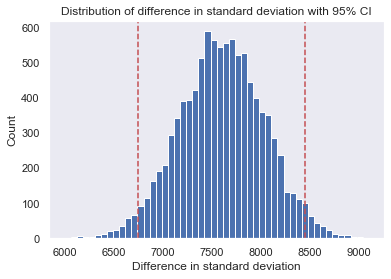

In [10]:
# Create histogram
_ = plt.hist(boot_std_diff, bins=50)
_ = plt.xlabel('Difference in standard deviation')
_ = plt.ylabel('Count')
_ = plt.title('Distribution of difference in standard deviation with 95% CI')
_ = plt.axvline(ci_lower_std_dif, color='r', linestyle='--')
_ = plt.axvline(ci_upper_std_dif, color='r', linestyle='--')

The test is:

* H0:  There is no difference in price between yes-insurance and no-insurance groups
* H1:  There is a difference
* The bootstrapping exercises gives us a 95% confidence interval between 6741 and 8452.  
* That range does not include zero.
* We cannot reject the null and accept the alternative.  

## Estimate confidence interval and p-value

__Q:__ Perform a bootstrapped hypothesis test at the 5% significance level ($\alpha = 0.05$) to calculate the p-value of the observed difference between insurance and non-insurance charges, state your null and alternative hypotheses and whether you retain or reject the null hypothesis for the given significance level.

The test is:

* H0:  There is no difference in means
* H1:  There is a difference in means
* All at a 5% significance level

In [11]:
# Calc actual difference in means
actual_mean_dif = np.mean(actual_insur_yes) - np.mean(actual_insur_no)

In [12]:
# Shift the means
np.random.seed(47)
actual_insur_no_shifted = actual_insur_no - np.mean(actual_insur_no) + np.mean(actual_insur_yes)

In [13]:
# Create a function to get samples
def sample(data1, data2):
    data = np.random.permutation( np.concatenate((data1, data2)) )
    perm_sample_1 = data[:len(data1)]
    perm_sample_2 = data[len(data1):]
    return perm_sample_1, perm_sample_2

In [14]:
# Create replicates
sample_mean_replicates = np.empty(N_rep)

for i in range(N_rep):
    sample_insur_yes, sample_insur_no = sample(actual_insur_yes, actual_insur_no_shifted)
    sample_mean_replicates[i] = np.mean(sample_insur_yes) - np.mean(sample_insur_no)

In [15]:
p_val = np.sum(sample_mean_replicates >= actual_mean_dif)/len(sample_mean_replicates)
print('The p value is {}'.format(p_val))

The p value is 0.0


* The p-value is zero or very, very close to zero
* We reject the null and accept the alternative

__Q__: To put the above result in perspective, plot the histogram of your bootstrapped differences along with lines marking the locations of the observed difference. (Why would we plot more than one line, given that we only have one observed difference?)

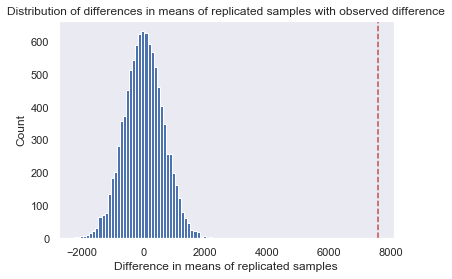

In [16]:
# Create histogram
_ = plt.hist(sample_mean_replicates, bins=50)
_ = plt.xlabel('Difference in means of replicated samples')
_ = plt.ylabel('Count')
_ = plt.title('Distribution of differences in means of replicated samples with observed difference')
_ = plt.axvline(actual_mean_dif, color='r', linestyle='--')

__Q:__ Compare your p-value above with that obtained using the _t_-test function in the previous assignment. Do you think you would want to try to perform enough bootstrap replicates to observe a random difference as large as that we did observe?

* Both p values are practically zero. 
* More replicates are not likely to make a difference.

__Q:__ Consider the two variants of the _t_-test we performed in the previous assignment. Which one would you use now?

* The question is whether our samples have the same variance.
* I don't see a reason why we'd assume they would do so.
* So, we might use the Welch's t-test, unless proved otherwise

__Q:__ If, instead of being asked whether the means of two groups were different, you were working with an ad-recommender team who wanted to release a new recommendation algorithm, and you were looking at click-through rate both for the current algorithm (call it A) and from trials of their new algorithm (call it B), would you perform a two-sided test as above? What would be your null and alternative hypotheses and what would be the real-world consequence of rejecting the null hypothesis?

* H0:  There is no improvement in the click-through rate of the new algorithm over the old
* H1:  There is an improvement in the click-through rate of the new algorithm over the old
* If you rejected the null and accepted the alternative, you'd adopt the new algorithm.